In [ ]:
!pip install -U seaborn-image

In [245]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score 
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn_image as isns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
df = pd.read_csv('/content/drive/MyDrive/task_1/data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/task_1/test_data.csv')

In [ ]:
df1

In [172]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,0.0,210.000000,1101.000000,1396.000000,1409.000000,1056.000000,354.000000,40.000000,5.000000,591.000000,...,92.000000,0.0,180.000000,1098.000000,1378.000000,1353.000000,1058.000000,480.000000,91.000000,1437.000000
mean,NaN,2.057143,6.748411,12.194126,12.151881,8.102273,5.855932,4.825000,1.600000,4.774958,...,3.206522,NaN,2.255556,7.260474,12.613208,12.586105,9.200378,6.243750,5.824176,4.530967
std,NaN,1.385700,4.325748,3.800056,3.933168,5.203076,4.667910,4.229854,0.547723,3.234106,...,2.308789,NaN,1.578919,4.666011,3.698401,4.007594,5.001941,4.999892,4.873040,2.880860
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,1.000000,3.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,NaN,1.000000,3.000000,11.000000,11.000000,5.000000,2.000000,1.000000,2.000000
50%,NaN,2.000000,6.000000,13.000000,13.000000,8.000000,4.000000,2.500000,2.000000,4.000000,...,3.000000,NaN,2.000000,6.000000,14.000000,14.000000,9.000000,5.000000,5.000000,5.000000
75%,NaN,3.000000,10.000000,15.000000,15.000000,13.000000,9.000000,8.250000,2.000000,7.000000,...,4.000000,NaN,3.000000,11.000000,16.000000,16.000000,14.000000,10.000000,9.000000,7.000000
max,NaN,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,NaN,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


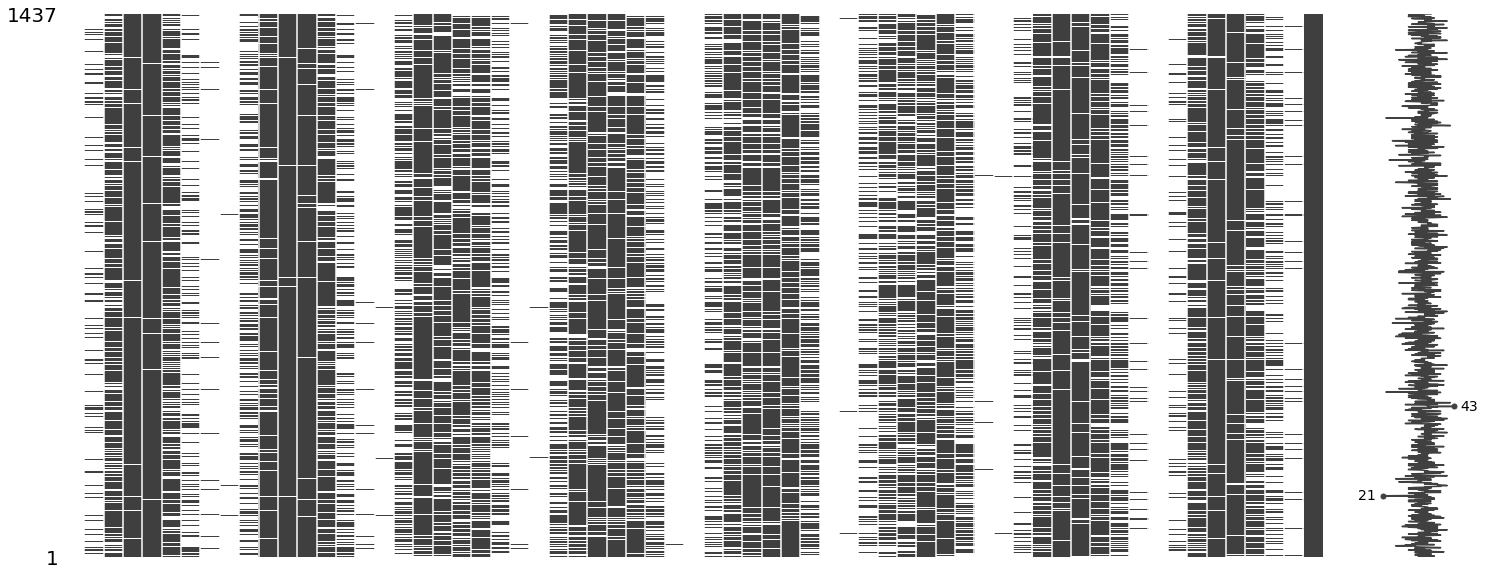

In [173]:
msno.matrix(df)


In [174]:
df.isnull().sum()


pixel_0_0    1437
pixel_0_1    1227
pixel_0_2     336
pixel_0_3      41
pixel_0_4      28
             ... 
pixel_7_4      84
pixel_7_5     379
pixel_7_6     957
pixel_7_7    1346
target          0
Length: 65, dtype: int64

In [116]:
# df_filled = df.fillna(0)
# df_filled

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,4.0,14.0,16.0,16.0,15.0,2.0,0.0,0.0,12.0,...,0.0,0.0,4.0,15.0,16.0,16.0,11.0,0.0,0.0,3
1,0.0,0.0,8.0,14.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,7.0,0.0,0.0,0.0,0.0,7
2,0.0,0.0,0.0,0.0,5.0,14.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,13.0,4.0,0.0,1
3,0.0,0.0,9.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,15.0,12.0,16.0,16.0,9.0,2
4,0.0,0.0,11.0,7.0,12.0,15.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,12.0,16.0,10.0,1.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,1.0,12.0,12.0,12.0,15.0,6.0,0.0,0.0,1.0,...,0.0,0.0,2.0,16.0,15.0,8.0,1.0,0.0,0.0,5
1433,0.0,0.0,4.0,9.0,13.0,13.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,12.0,14.0,8.0,0.0,0.0,5
1434,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.0,16.0,14.0,7.0,0.0,6
1435,0.0,0.0,4.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,12.0,5.0,0.0,0.0,0


In [175]:
data_targets = df['target']

In [119]:
data_targets

0       3
1       7
2       1
3       2
4       5
       ..
1432    5
1433    5
1434    6
1435    0
1436    6
Name: target, Length: 1437, dtype: int64

In [179]:
data_features = df.iloc[:,:-1]
data_features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,NaN,4.0,14.0,16.0,16.0,15.0,2.0,NaN,NaN,12.0,...,8.0,NaN,NaN,4.0,15.0,16.0,16.0,11.0,NaN,NaN
1,NaN,NaN,8.0,14.0,16.0,16.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,7.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.0,14.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,13.0,4.0,NaN
3,NaN,NaN,9.0,16.0,7.0,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,9.0,15.0,12.0,16.0,16.0,9.0
4,NaN,NaN,11.0,7.0,12.0,15.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,12.0,16.0,10.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,NaN,1.0,12.0,12.0,12.0,15.0,6.0,NaN,NaN,1.0,...,NaN,NaN,NaN,2.0,16.0,15.0,8.0,1.0,NaN,NaN
1433,NaN,NaN,4.0,9.0,13.0,13.0,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,3.0,12.0,14.0,8.0,NaN,NaN
1434,NaN,NaN,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,4.0,14.0,16.0,14.0,7.0,NaN
1435,NaN,NaN,4.0,13.0,11.0,7.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,3.0,16.0,12.0,5.0,NaN,NaN


***Distributiom of targets***

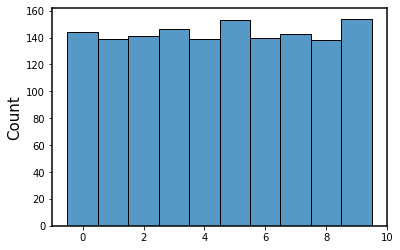

In [211]:
target_hist = np.array(data_targets)
sns.histplot(target_hist , discrete=True)

***Ploting some rows with function***

In [212]:
def drawImage(dataRow):
  dataRow = np.nan_to_num(np.array(dataRow).reshape(8,8))
  plt.matshow(dataRow)


7


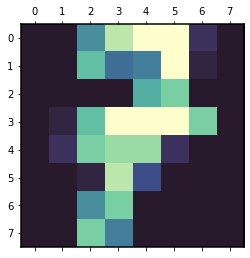

In [213]:
drawImage(data_features.iloc[1])
print(data_targets[1])

5


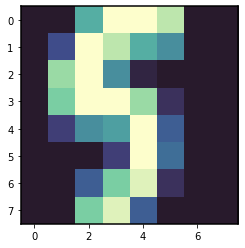

In [209]:
drawImage(data_features.iloc[20])
print(data_targets[20])

***Defining IMPUTER***

In [224]:
imputer = SimpleImputer(missing_values=np.nan , fill_value=0)


***Creating Pipelines***

In [233]:
pipeline_dt = Pipeline([('scalar1', MinMaxScaler()), 
                        ('imputer', SimpleImputer(missing_values=np.nan, fill_value=0)),
                        ('dt_classifier',DecisionTreeClassifier())])

In [234]:
pipeline_rf = Pipeline([('scalar1', MinMaxScaler()),
                        ('imputer' , SimpleImputer(missing_values=np.nan, fill_value=0)),
                        ('dt_classifier',RandomForestClassifier())])

In [235]:
pipeline_knn = Pipeline([('scalar1', MinMaxScaler()),
                         ('imputer', SimpleImputer(missing_values=np.nan, fill_value=0)),
                         ('dt_classifier',KNeighborsClassifier())])

In [220]:
best_accuray = 0
best_clasifier=0
best_pipeline=""

In [241]:
pipe_dict = {'Decision Tree': pipeline_dt , "Random Forest": pipeline_rf, "KNN": pipeline_knn }

In [ ]:
for pipe in pipe_dict.values():
  pipe.fit(data_features , data_targets)

In [243]:
for name , pipeline in pipe_dict.items():
  print("{} Train Accuracy {}".format(name , pipeline.score(data_features , data_targets)))

Decision Tree Train Accuracy 1.0
Random Forest Train Accuracy 1.0
KNN Train Accuracy 0.9485038274182325


In [247]:
# dec_tree = DecisionTreeClassifier()
# rand_for=RandomForestClassifier()
# k_nn = KNeighborsClassifier()

In [250]:
grid_params_tree ={"dt_classifier__max_depth": list(range(1,14)) , 
                   "dt_classifier__criterion": ['gini' , 'entropy']}

In [ ]:
grid_tree = GridSearchCV(pipeline_dt,grid_params_tree,cv=5)
grid_tree.fit(data_features,data_targets)

In [254]:
grid_tree.best_score_


0.7912335462640342

In [255]:
grid_tree.best_params_

{'dt_classifier__criterion': 'entropy', 'dt_classifier__max_depth': 8}

In [257]:
grid_params_knn = {"dt_classifier__n_neighbors" : list(range(1,11))}

In [ ]:
grid_knn = GridSearchCV(pipeline_knn, grid_params_knn , cv=5)
grid_knn.fit(data_features,data_targets)

In [261]:
grid_knn.best_params_

{'dt_classifier__n_neighbors': 1}

In [262]:
grid_knn.best_score_

0.9122967479674797

In [270]:
pipeline_knn_with_pca = Pipeline([('scalar1', MinMaxScaler()),
                                  ('imputer', SimpleImputer(missing_values=np.nan, fill_value=0)),
                                  ('pca', PCA()),
                                  ('dt_classifier',KNeighborsClassifier())])

In [ ]:
grid_params_knn_with_pca = {"pca__n_components": [25,30,35,40,45,50,55,60,64],
                           "dt_classifier__n_neighbors" : list(range(1,11))}

grid_knn_pca = GridSearchCV(pipeline_knn_with_pca, grid_params_knn_with_pca , cv=5)
grid_knn_pca.fit(data_features,data_targets)

In [277]:
grid_knn_pca.best_params_

{'dt_classifier__n_neighbors': 1, 'pca__n_components': 45}

In [284]:
best_model = grid_knn_pca.best_estimator_

In [278]:
grid_knn_pca.best_score_

0.9136880565234223

In [282]:
X_test = df1.iloc[:,:-1]
y_test = df1['target']

In [285]:
best_model.score(X_test, y_test)

0.9083333333333333